In [7]:
import cv2
import numpy as np
import os
os.chdir('C:\\Users\\Bob\\Desktop\\beauty\\ap')

# Load the image and convert it to grayscale
image = cv2.imread("svdm.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set the blob detection parameters
params = cv2.SimpleBlobDetector_Params()
#params.filterByArea = True
#params.minArea = 10
#params.maxArea = 1000000000
params.filterByCircularity = True
params.minCircularity = 0.
params.filterByConvexity = True
#params.minConvexity = 0.5

# Create the detector object
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs in the image
keypoints = detector.detect(gray)

# Draw blobs on the image
image_with_blobs = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the image
cv2.imshow("Blobs", image_with_blobs)
cv2.waitKey(0)


-1

In [15]:
#DoH

import cv2
import numpy as np
import os
os.chdir('C:\\Users\\Bob\\Desktop\\beauty\\ap')

def detect_blobs(image, threshold=10):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the Hessian matrix of the image
    hessian = cv2.cornerHarris(gray, 3, 3, 0.2)

    # Find local maxima in the determinant of the Hessian
    maxima = cv2.dilate(hessian, None)
    mask = hessian > threshold * maxima

    # Extract the blobs from the image
    blobs = []
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i, j]:
                blobs.append((i, j))

    return blobs

# Load the image and detect blobs
image = cv2.imread("svdm.png")
blobs = detect_blobs(image)

# Draw the blobs on the image
for blob in blobs:
    cv2.circle(image, blob, 2, (0, 255, 0), -1)

# Show the image
cv2.imshow("Blobs", image)
cv2.waitKey(0)


27

In [6]:
#DoG

import cv2
import numpy as np
import os
os.chdir('C:\\Users\\Bob\\Desktop\\beauty\\ap')


def detect_blobs(image, sigma1=3.0, sigma2=2.0, k=2.0):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian filters to the image at different scales
    blur1 = cv2.GaussianBlur(gray, (0, 0), sigma1)
    blur2 = cv2.GaussianBlur(gray, (0, 0), sigma2)

    # Take the difference between the filtered images
    diff = blur2 - blur1

    # Normalize the difference image
    min_val, max_val, _, _ = cv2.minMaxLoc(diff)
    diff = (diff - min_val) / (max_val - min_val)

    # Threshold the difference image to highlight the blobs
    _, mask = cv2.threshold(diff, k, 255, cv2.THRESH_BINARY)

    # Extract the blobs from the image
    blobs = []
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i, j]:
                blobs.append((i, j))

    return blobs

# Load the image and detect blobs
image = cv2.imread("svdm.png")
blobs = detect_blobs(image)

# Draw the blobs on the image
for blob in blobs:
    cv2.circle(image, blob, 2, (0, 255, 0), -1)

# Show the image
cv2.imshow("Blobs", image)
cv2.waitKey(0)


-1

In [9]:
import numpy as np
import cv2
import os
os.chdir('C:\\Users\\Bob\\Desktop\\beauty\\ap')

def hough_circles(image, min_radius, max_radius):
    # Convert the image to grayscale and apply a threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Create a list to store the detected circles
    circles = []

    # Iterate over a range of possible circle radii
    for radius in range(min_radius, max_radius + 1):
        # Create a votes matrix with the same dimensions as the image
        votes = np.zeros_like(image)

        # Iterate over the edge pixels in the image
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                if binary[y, x] == 255:
                    # Increment the votes for all locations in the votes matrix that correspond to a sine wave with the current radius and center at the edge pixel's location
                    for theta in range(360):
                        a = x - radius * np.cos(np.deg2rad(theta))
                        b = y - radius * np.sin(np.deg2rad(theta))
                        if 0 <= a < votes.shape[1] and 0 <= b < votes.shape[0]:
                            votes[int(b), int(a)] += 1

        # Find the local maxima in the votes matrix
        local_maxima = []
        for y in range(1, votes.shape[0] - 1):
            for x in range(1, votes.shape[1] - 1):
                if np.all(votes[y, x] > votes[y - 1, x]) and np.all(votes[y, x] > votes[y + 1, x]) and np.all(votes[y, x] > votes[y, x - 1]) and np.all(votes[y, x] > votes[y, x + 1]):
                    local_maxima.append((x, y, radius))

                # Use non-maximum suppression to filter out false positive detections
                #if votes[y, x] > votes[y - 1, x] and votes[y, x] > votes[y + 1, x] and votes[y, x] > votes[y, x - 1] and votes[y, x] > votes[y, x + 1]:
                #    local_maxima.append((x, y, radius))
        # Add the detected circles to the list
        circles.extend(local_maxima)

    # Overlay the detected circles on the input image
    for circle in circles:
        cv2.circle(image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)

    # Return the image with the detected circles
    return image

# Load the image and detect circles
image = cv2.imread("hou.png")
result = hough_circles(image, 5, 50)

# Show the image
cv2.imshow("Circles", result)
cv2.waitKey(0)


-1

In [5]:
import cv2
import math
import os
os.chdir('C:\\Users\\Bob\\Desktop\\beauty\\ap')

def measure_ridge_length(image_path):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to the image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges in the image using Canny edge detection
    edges = cv2.Canny(blur, 50, 200)

    # Detect lines in the edge map using the Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, math.pi/180, 50, minLineLength=10, maxLineGap=5)

    # Initialize a list to store the lengths of the lines
    lengths = []

    # Iterate through the detected lines
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        # Draw the line on the image
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Measure the length of the line using the distance formula
        length = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        lengths.append(length)

    # Display the image with the overlaid lines
    cv2.imshow("Ridges", image)
    cv2.waitKey(0)
    
    # Return the lengths of the lines
    return lengths
    

# Measure the length of the ridges in an image
lengths = measure_ridge_length("pla.png")

print(lengths)


[24.041630560342615, 22.47220505424423, 65.43699259593154, 22.80350850198276, 16.1245154965971, 13.601470508735444, 16.64331697709324, 31.38470965295043, 20.518284528683193, 47.20169488482379, 26.076809620810597, 28.0178514522438, 36.235341863986875, 27.018512172212592, 15.264337522473747, 35.4682957019364, 20.615528128088304, 22.360679774997898, 31.400636936215164, 22.80350850198276, 30.805843601498726, 15.620499351813308, 28.600699292150182, 40.607881008493905, 39.0, 15.620499351813308, 17.804493814764857, 20.808652046684813, 16.97056274847714, 26.92582403567252, 24.041630560342615, 25.495097567963924, 36.87817782917155, 27.784887978899608, 13.416407864998739, 24.839484696748443, 21.400934559032695, 17.69180601295413, 23.600847442411894, 17.804493814764857, 12.083045973594572, 16.401219466856727, 23.600847442411894, 16.97056274847714, 13.601470508735444, 24.041630560342615, 18.027756377319946, 21.540659228538015, 12.806248474865697, 14.422205101855956, 20.615528128088304]


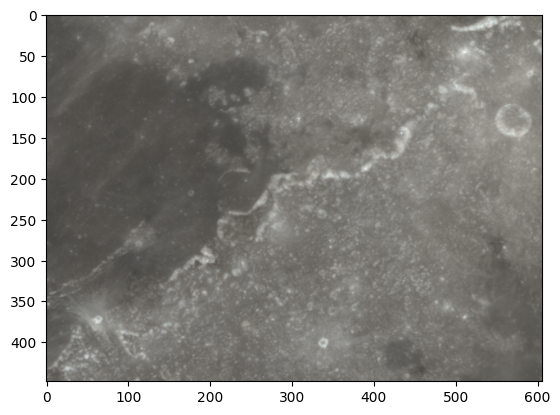

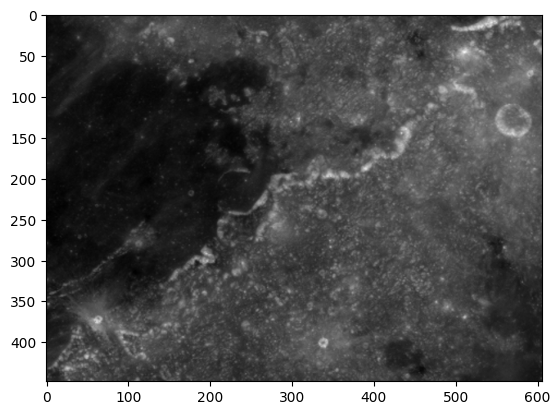

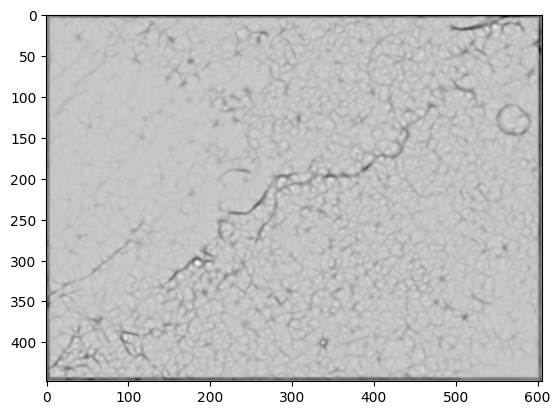

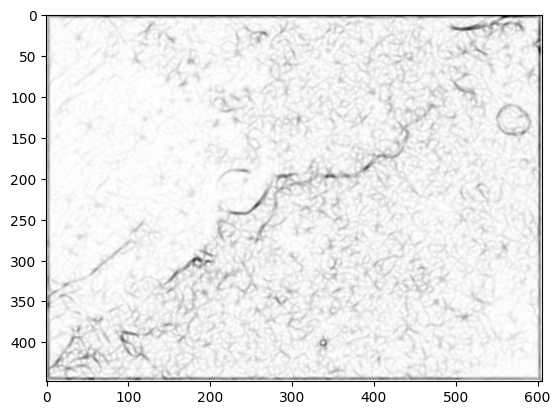

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
import os
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage import morphology, filters
from skimage import io, filters, feature
from skimage import util

os.chdir('C:\\Users\\Bob\\Desktop\\beauty')
path = 'beauty.png'
pla = 'pla.png'

def detect_ridges(gray, sigma):
    hessian = hessian_matrix(gray, sigma=sigma, order='rc')
    min_ridges = hessian_matrix_eigvals(hessian)[1]
    return min_ridges

img = io.imread(path)
plt.imshow(img)
plt.show()
img = cv2.imread(path)#, cv2.IMREAD_GRAYSCALE)
pl = cv2.imread(pla)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = rgb2gray(img)

a = detect_ridges(img, sigma=2)
#a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
#a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(a, cmap='gray')
plt.show()
bg = cv2.dilate(a, np.ones((5,5), dtype=np.uint8))
bg = cv2.GaussianBlur(bg, (5,5), 1)
a_no_bg = 255 - cv2.absdiff(a, bg)
plt.imshow(a_no_bg, cmap='gray')
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


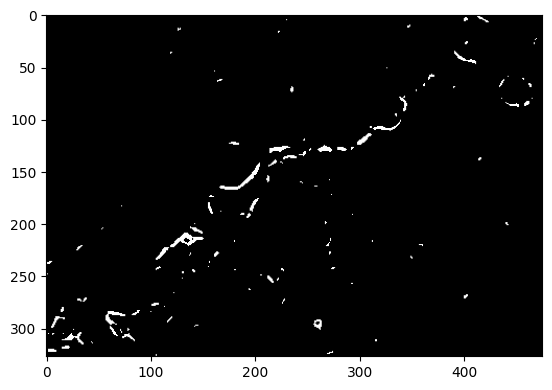

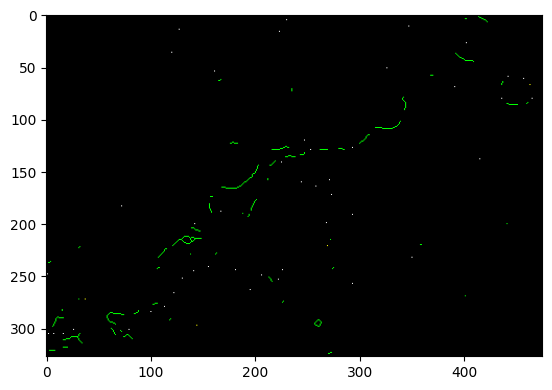

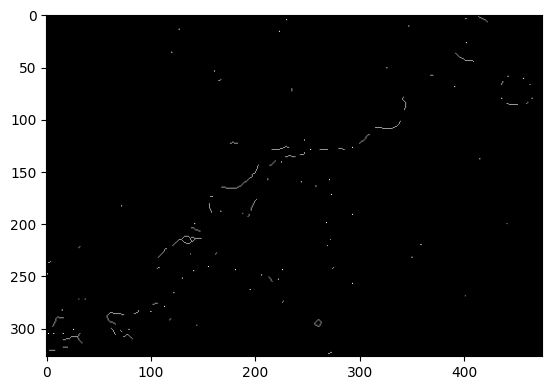

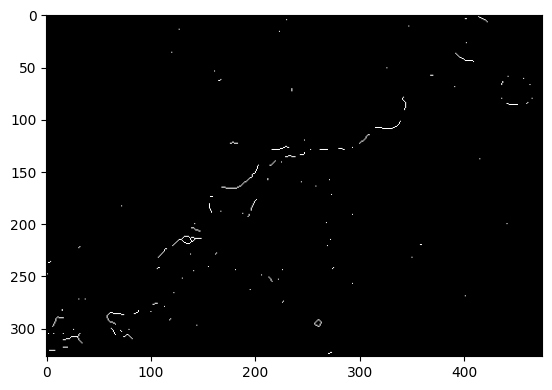

106


In [7]:
from skimage.filters import threshold_otsu

#fig, ax = try_all_threshold(a_no_bg, figsize=(10,8), verbose=False)



#binary 

###image = a_no_bg
###thresh = threshold_otsu(image)
###binary = image > thresh

#fig, axes = plt.subplots(ncols=1)#, figsize=(8, 5))
#ax = axes.ravel()

#ax[0].imshow(image, cmap=plt.cm.gray)
#ax[0].set_title('Original')

#ax[0].imshow(binary, cmap=plt.cm.gray)
#ax[0].set_title('Thresholded')

inverted = util.invert(a_no_bg)
print(type(inverted))
print(type(img))
ret,th1 = cv2.threshold(pl,70,255,cv2.THRESH_BINARY)

plt.imshow(th1, cmap='gray')
plt.show()


skeleton = skeletonize(th1)
plt.imshow(skeleton, cmap='gray')
plt.show()
#cv2.imwrite('test.png', skeleton)
gri = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(gri, cmap='gray')
plt.show()
ret2,th2 = cv2.threshold(gri, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(th2, cmap='gray')
plt.show()
cts, hier = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(cts))

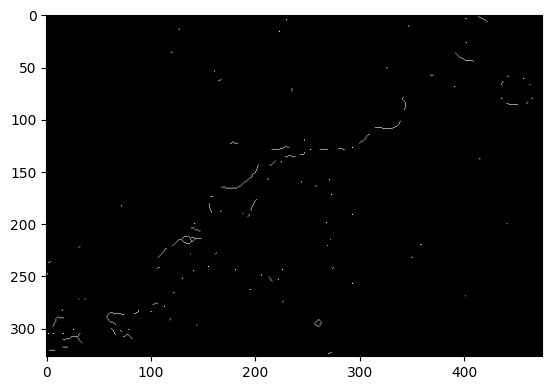

Connected component 1 has size 9
Connected component 2 has size 1
Connected component 3 has size 2
Connected component 4 has size 1
Connected component 5 has size 1
Connected component 6 has size 1
Connected component 7 has size 1
Connected component 8 has size 1
Connected component 9 has size 18
Connected component 10 has size 1
Connected component 11 has size 1
Connected component 12 has size 3
Connected component 13 has size 1
Connected component 14 has size 1
Connected component 15 has size 3
Connected component 16 has size 4
Connected component 17 has size 1
Connected component 18 has size 1
Connected component 19 has size 3
Connected component 20 has size 13
Connected component 21 has size 1
Connected component 22 has size 1
Connected component 23 has size 11
Connected component 24 has size 2
Connected component 25 has size 26
Connected component 26 has size 11
Connected component 27 has size 1
Connected component 28 has size 8
Connected component 29 has size 17
Connected compone

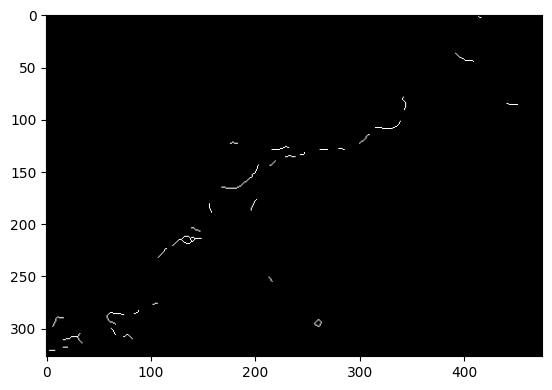

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\Bob\\Desktop\\beauty\\ap')

# Load the image and convert it to grayscale
image = cv2.imread('tt.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()
# Use connected component labeling to identify the connected components in the image
ret, labels = cv2.connectedComponents(gray)

# The labels image now contains a unique label for each connected component
# You can now loop through the labels image and analyze each component individually
for label in range(1, ret):
    # Extract the component with the current label
    component = np.zeros_like(gray)
    component[labels == label] = 255

    # Do something with the component, such as count the number of pixels or measure its size
    size = cv2.countNonZero(component)
    print(f'Connected component {label} has size {size}')

import cv2
import numpy as np

# Load the image and convert it to grayscale
image = cv2.imread('tt.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use connected component labeling to identify the connected components in the image
ret, labels = cv2.connectedComponents(gray)

# Create an empty image to store the first 10 components
output_image = np.zeros_like(gray)

# Create a list to store the sizes of the components
sizes = []

# Loop through the labels image and measure the size of each component
for label in range(1, ret):
    component = np.zeros_like(gray)
    component[labels == label] = 255
    size = cv2.countNonZero(component)
    sizes.append((label, size))

# Sort the components by size
sizes.sort(key=lambda x: x[1], reverse=True)

# Extract the first 10 components and add them to the output image
for i in range(30):
    component = np.zeros_like(gray)
    component[labels == sizes[i][0]] = 255
    output_image += component
    size = cv2.countNonZero(component)
    print(f'Connected component {label} has size {size}')

# The output image now contains only the first 10 connected components by size

distances = [0] * len(sizes)
for i in range(len(sizes)):
    distances[i] = sizes[i] * 400 # 400m/pixel => an array of ridge lengths in kilometers

for i in range(len(distances)):
    cv2.putText(img=output_image, text=str(distances[i]), org=(100, 25), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(0, 255, 0),thickness=1)

plt.imshow(output_image, cmap='gray')
plt.show()

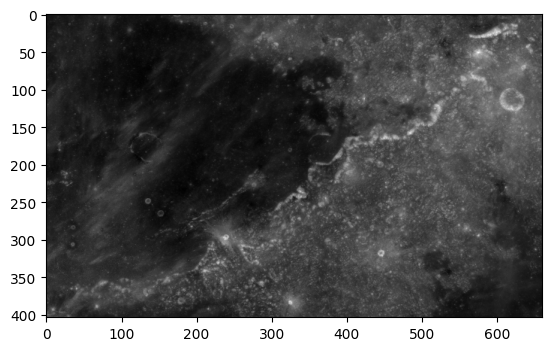

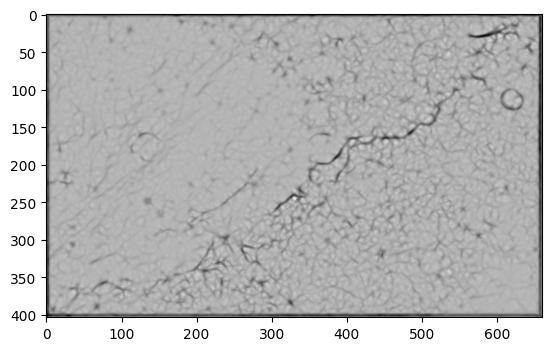

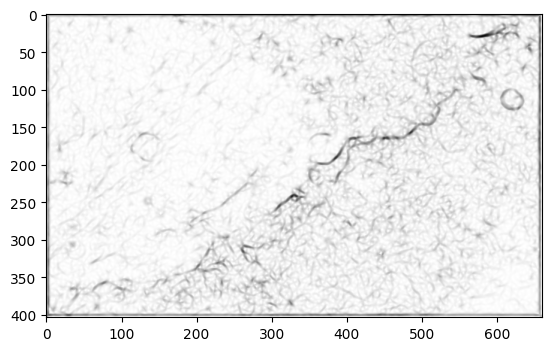

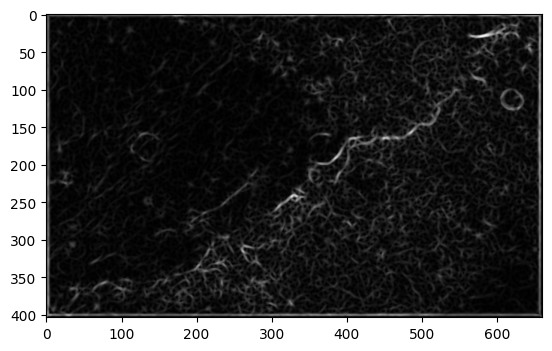

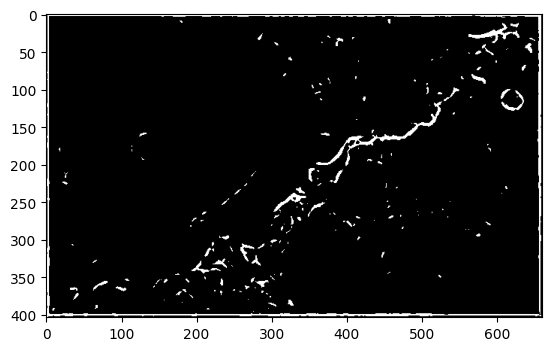

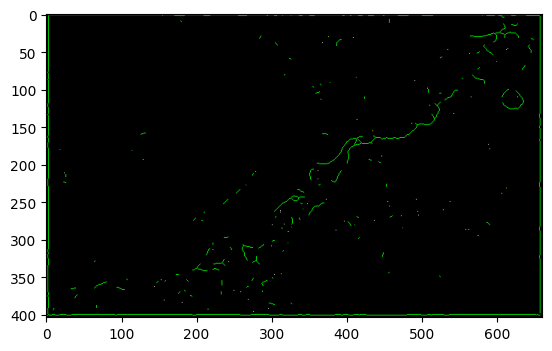

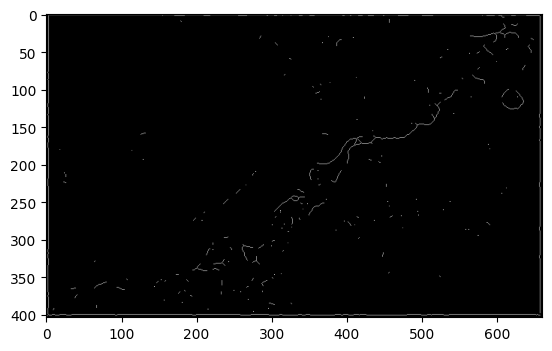

Connected component 1 has size 2108
Connected component 2 has size 5
Connected component 3 has size 2
Connected component 4 has size 95
Connected component 5 has size 9
Connected component 6 has size 4
Connected component 7 has size 1
Connected component 8 has size 1
Connected component 9 has size 4
Connected component 10 has size 11
Connected component 11 has size 4
Connected component 12 has size 1
Connected component 13 has size 16
Connected component 14 has size 11
Connected component 15 has size 1
Connected component 16 has size 1
Connected component 17 has size 1
Connected component 18 has size 4
Connected component 19 has size 1
Connected component 20 has size 1
Connected component 21 has size 1
Connected component 22 has size 3
Connected component 23 has size 1
Connected component 24 has size 7
Connected component 25 has size 3
Connected component 26 has size 2
Connected component 27 has size 20
Connected component 28 has size 1
Connected component 29 has size 2
Connected compo

ValueError: attempt to get argmax of an empty sequence

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\Bob\\Desktop\\doctorat\\articol')

from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage import morphology, filters
from skimage import io, filters, feature
from skimage import util
from skimage.filters import threshold_otsu

def detect_ridges(gray, sigma):
    hessian = hessian_matrix(gray, sigma=sigma, order='rc')
    min_ridges = hessian_matrix_eigvals(hessian)[1]
    return min_ridges

im = cv2.imread('100%zoom_400mperpx.png')
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

a = detect_ridges(img, sigma=2)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(a, cmap='gray')
plt.show()
bg = cv2.dilate(a, np.ones((5,5), dtype=np.uint8))
bg = cv2.GaussianBlur(bg, (5,5), 1)
a_no_bg = 255 - cv2.absdiff(a, bg)
plt.imshow(a_no_bg, cmap='gray')
plt.show()

inverted = util.invert(a_no_bg)
plt.imshow(inverted, cmap='gray')
plt.show()
plt.imsave('inverted.jpg', inverted, cmap='gray')
inv = cv2.imread('inverted.jpg')
ret, th1 = cv2.threshold(inv, 65, 255, cv2.THRESH_BINARY)# | cv2.THRESH_OTSU)
plt.imshow(th1, cmap='gray')
plt.show()

skeleton = skeletonize(th1)
plt.imshow(skeleton, cmap='gray')
plt.show()
cv2.imwrite('greens.png', skeleton)
gri = cv2.imread('greens.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(gri, cmap='gray')
plt.show()

# Use connected component labeling to identify the connected components in the image
comp, labels = cv2.connectedComponents(gri)

sizes = []

# The labels image now contains a unique label for each connected component
# You can now loop through the labels image and analyze each component individually
for label in range(1, comp):
    # Extract the component with the current label
    component = np.zeros_like(gri)
    component[labels == label] = 255

    # Do something with the component, such as count the number of pixels or measure its size
    size = cv2.countNonZero(component)
    print(f'Connected component {label} has size {size}')
    
    sizes.append((label, size))

# Create an empty image to store the first 10 components
output_image = np.zeros_like(gri)

# Sort the components by size
sizes.sort(key=lambda x: x[1], reverse=True)



#output_image[comp == largest] = 0
#output_image[comp == largest] = 0
#output_image[comp == largest] = 0
#output_image[comp == largest] = 0

# Extract the first 10 components and add them to the output image
for i in range(10):
    component = np.zeros_like(gri)
    component[labels == sizes[i][0]] = 255
    output_image += component
    size = cv2.countNonZero(component)
    print(f'Connected component {label} has size {size}')

sizes2 = []

for label in np.unique(comp):#(1, comp):#(labels):#np.unique(comp):
    if label == 0:
        # Skip the background component
        continue
    # Find the center of the component
    #y, x = np.where(comp == label)
    #print(x)
    indices = np.where(comp == label)
    if len(indices) != 2:
        # Skip invalid input tuples
        continue
    y, x = indices
    center_x = int(np.mean(x))
    center_y = int(np.mean(y))
    # Draw the text on the image
    cv2.putText(image, str(np.sum(comp == label)), (center_x, center_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

largest = np.argmax(sizes2)
print(largest)
#output_image[labels == 5] = 0
#cu 0 nu merge pt ca e background
output_image[labels == 1] = 0

#output_image[comp == largest] = 0
# The output image now contains only the first 10 connected components by size

#distances = [0] * len(sizes)
#total_dist = 0
#for i in range(len(sizes)):
#    distances[i] = sizes[i] * 400 # 400m/pixel => an array of ridge lengths in kilometers
#    total_dist += distances[i]
#    print(str(distances[i]) + ' km')
#print('Total distance: ' + str(total_dist) + ' km')

#for i in range(len(distances)):
#    cv2.putText(img=output_image, text=str(distances[i]), org=(100, 25), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(0, 255, 0),thickness=1)

plt.imshow(output_image, cmap='gray')
plt.show()


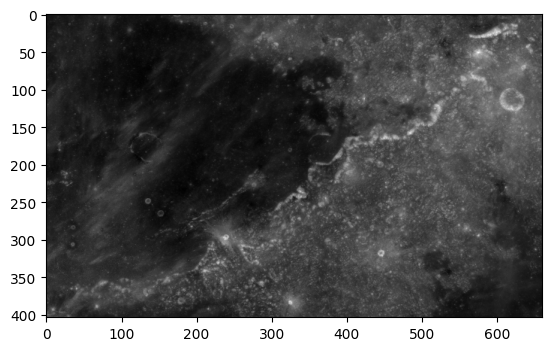

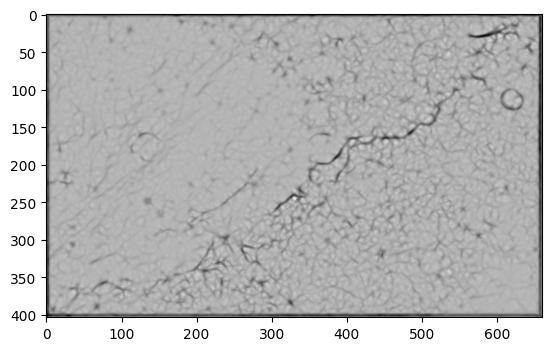

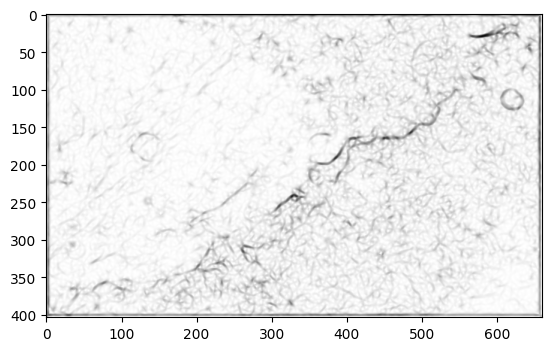

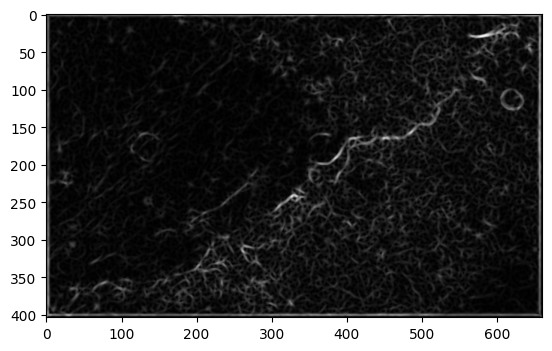

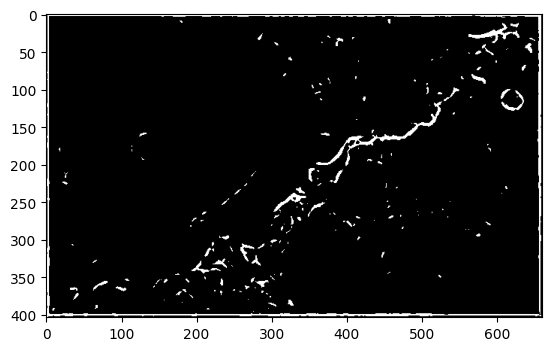

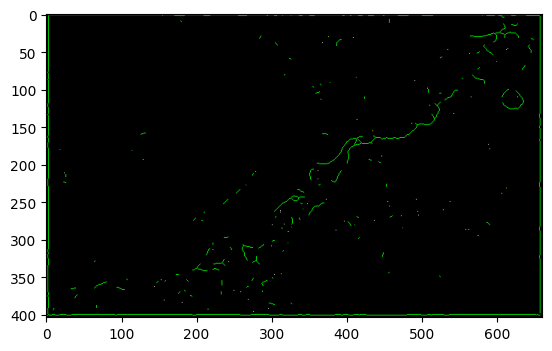

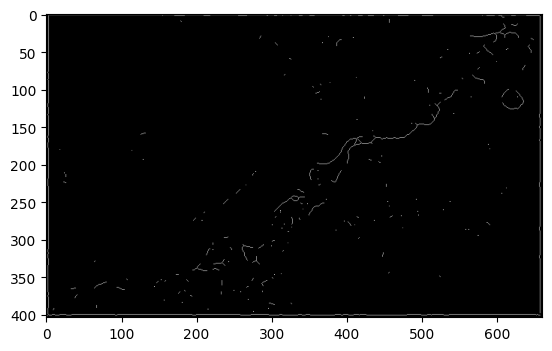

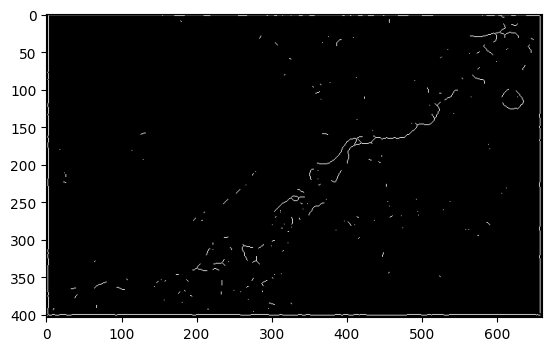

Connected component 0 has size 2108 km
Connected component 1 has size 256 km
Connected component 2 has size 95 km
Connected component 3 has size 52 km
Connected component 4 has size 47 km
Connected component 5 has size 34 km
Connected component 6 has size 25 km
Connected component 7 has size 25 km
Connected component 8 has size 21 km
Connected component 9 has size 21 km


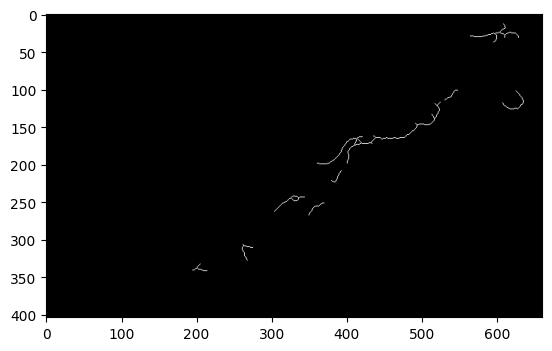

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\Bob\\Desktop\\doctorat\\articol')

from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage import morphology, filters
from skimage import io, filters, feature
from skimage import util
from skimage.filters import threshold_otsu

def detect_ridges(gray, sigma):
    hessian = hessian_matrix(gray, sigma=sigma, order='rc')
    min_ridges = hessian_matrix_eigvals(hessian)[1]
    return min_ridges

im = cv2.imread('100%zoom_400mperpx.png')
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

a = detect_ridges(img, sigma=2)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(a, cmap='gray')
plt.show()
bg = cv2.dilate(a, np.ones((5,5), dtype=np.uint8))
bg = cv2.GaussianBlur(bg, (5,5), 1)
a_no_bg = 255 - cv2.absdiff(a, bg)
plt.imshow(a_no_bg, cmap='gray')
plt.show()

inverted = util.invert(a_no_bg)
plt.imshow(inverted, cmap='gray')
plt.show()
plt.imsave('inverted.jpg', inverted, cmap='gray')
inv = cv2.imread('inverted.jpg')
ret, th1 = cv2.threshold(inv, 65, 255, cv2.THRESH_BINARY)# | cv2.THRESH_OTSU)
plt.imshow(th1, cmap='gray')
plt.show()

skeleton = skeletonize(th1)
plt.imshow(skeleton, cmap='gray')
plt.show()
cv2.imwrite('greens.png', skeleton)
gri = cv2.imread('greens.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(gri, cmap='gray')
plt.show()
dum, gri_bin = cv2.threshold(gri, 65, 255, cv2.THRESH_BINARY)
plt.imshow(gri_bin, cmap='gray')
plt.show()
# Use connected component labeling to identify the connected components in the image
comp, labels = cv2.connectedComponents(gri_bin)

sizes = []

# The labels image now contains a unique label for each connected component
# You can now loop through the labels image and analyze each component individually
for label in range(1, comp):
    # Extract the component with the current label
    component = np.zeros_like(gri_bin)
    component[labels == label] = 255

    # Do something with the component, such as count the number of pixels or measure its size
    size = cv2.countNonZero(component)
    #print(f'Connected component {label} has size {size}')
    
    sizes.append((label, size))

# Create an empty image to store the first 10 components
output_image = np.zeros_like(gri_bin)

# Sort the components by size
sizes.sort(key=lambda x: x[1], reverse=True)

# Extract the first 10 components and add them to the output image
for i in range(10):
    component = np.zeros_like(gri)
    component[labels == sizes[i][0]] = 255
    output_image += component
    size = cv2.countNonZero(component)
    distances = [0] * len(sizes)
    total_dist = 0
    print(f'Connected component {i} has size {size*1} km')

output_image[labels == 1] = 0
os.remove('greens.png')
os.remove('inverted.jpg')
comp2, labels2 = cv2.connectedComponents(output_image)

#output_image2 = np.zeros_like(output_image)
#for i in range(10):
#    component = np.zeros_like(output_image)
#    component[labels == sizes[i][0]] == 255
#    output_image2

#for i in np.nditer(comp2):
#    plt.imshow(comp2, cmap='gray')
#    plt.show()


plt.imshow(output_image, cmap='gray')
plt.show()
